In [48]:
# The purpose of this project is to become more familiar with NLP and using classification on text.  It follows closely the steps from: https://medium.com/analytics-vidhya/fake-news-detection-using-nlp-techniques-c2dc4be05f99

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
import plotly.graph_objects as go
import plotly.express as px

import sklearn as sklearn
from sklearn.model_selection import train_test_split


# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import scipy.cluster.hierarchy as sch
# from sklearn.mixture import GaussianMixture
# import tensorflow as tf

from pylab import rcParams

In [17]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')  #Full file path to project folder: /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
cd /content/gdrive/My Drive/Projects/FakeNews/

/content/gdrive/My Drive/Projects/FakeNews


In [19]:
ls

 Fake.csv   FakeNewsDetector.ipynb  'True (1).csv'   True.csv/


In [21]:
FakeDB = pd.read_csv('Fake.csv')
TrueDB = pd.read_csv('True (1).csv')

In [26]:
FakeDB.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [25]:
TrueDB.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [31]:
TrueDB['label'] = 1
FakeDB['label'] = 0
data = pd.concat([TrueDB, FakeDB])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



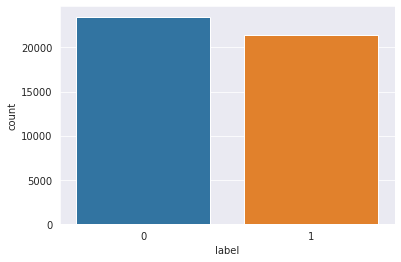

In [32]:
sns.set_style("darkgrid")
sns.countplot(data['label'])

In [33]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



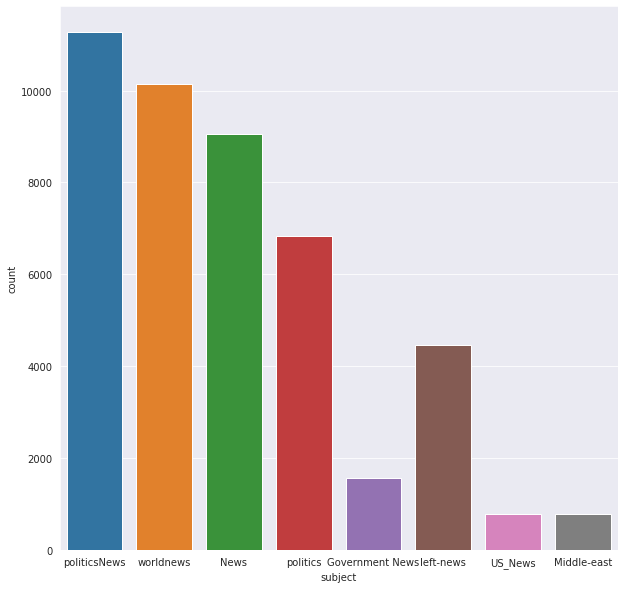

In [34]:
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

[Text(0, 0, '0'), Text(0, 0, '1')]

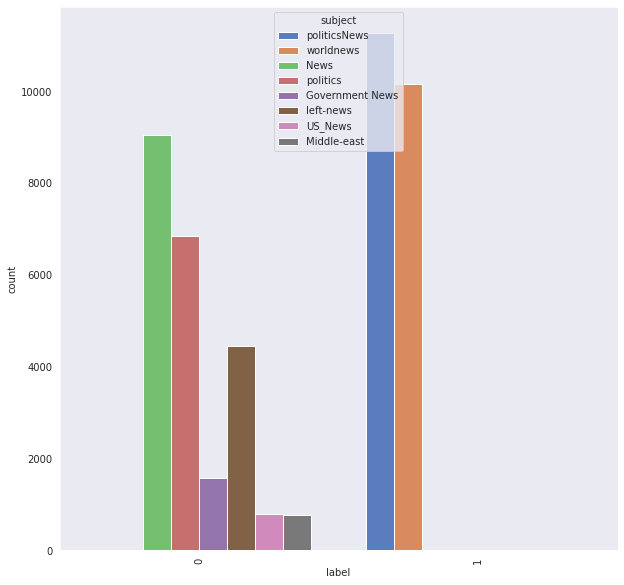

In [35]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [36]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)

In [38]:

from nltk.corpus import stopwords
from wordcloud import WordCloud


  
# # plot the word cloud for fake news data                      
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show()

In [40]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(" ".join(data[data['label'] == 0].text)) 

LookupError: ignored

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

LookupError: ignored

In [44]:
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)


accuracy:   93.909


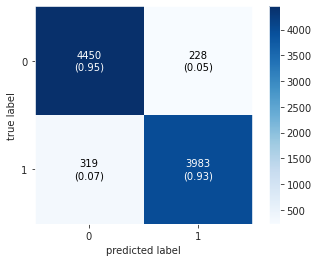

In [45]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.677


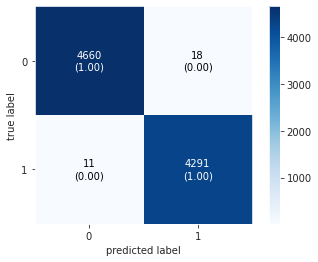

In [46]:
#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.710


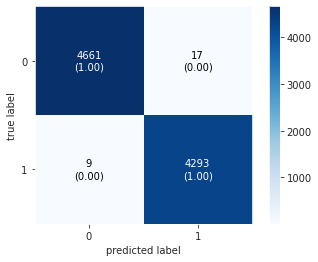

In [47]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()